In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
pip install transformers

     |████████████████████████████████| 2.1MB 5.9MB/s 
     |████████████████████████████████| 890kB 55.4MB/s 
     |████████████████████████████████| 3.2MB 55.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=b96e75e76a1b52fd0284fcea4a08a02301142dab88ac36c9c539f62971cba157
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [7]:
pip install simpletransformers

     |████████████████████████████████| 215kB 5.5MB/s 
     |████████████████████████████████| 1.2MB 7.0MB/s 
     |████████████████████████████████| 2.0MB 16.1MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 317kB 24.9MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 7.0MB 14.7MB/s 
     |████████████████████████████████| 163kB 56.0MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
     |████████████████████████████████| 133kB 49.9MB/s 
     |████████████████████████████████| 4.6MB 50.2MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
     |████████████████████████████████| 112kB 54.1MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 122kB 57.6MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=bd196cd9b3747d41caed31765ee05d0f022efa7704a7992bce0bde17d8cfa35d
  Stored in dir

In [1]:
import torch 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, accuracy_score
from simpletransformers.classification import ClassificationModel


In [2]:
import torch
torch.cuda.empty_cache()

In [3]:
#Data
train="drive/My Drive/Dataset/Train_Propagnda_Arabic2.txt"
dev="drive/My Drive/Dataset/Arabic_Dev_propagenda2.txt"
test="drive/My Drive/Dataset/Arabic_Test_Propaganda.txt"
covid="drive/My Drive/Dataset/covid19-spans.txt"

In [4]:
covid="drive/My Drive/Dataset/covid19-spans.txt"
covid_data=pd.read_table(covid, sep='\t')
covid_x=covid_data['covid19_span']

In [5]:
train_data = pd.read_table(train, sep='\t')
dev_data=pd.read_table(dev, sep='\t')
test_data=pd.read_table(test, sep='\t')
covid_data=pd.read_table(covid, sep='\t')

In [6]:
train_data.drop(train_data.loc[train_data['label']=='Repetition'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Bandwagon'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Straw_Men'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Whataboutism'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Reductio_ad_hitlerum'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Red_Herring'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Obfuscation,Intentional_Vagueness,Confusion'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Thought-terminating_Cliches'].index, inplace=True)

In [7]:
dev_data.drop(dev_data.loc[dev_data['label']=='Repetition'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Bandwagon'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Straw_Men'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Whataboutism'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Reductio_ad_hitlerum'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Red_Herring'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Obfuscation,Intentional_Vagueness,Confusion'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Thought-terminating_Cliches'].index,inplace=True)

In [8]:
test_data.drop(test_data.loc[test_data['label']=='Repetition'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Bandwagon'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Straw_Men'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Whataboutism'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Reductio_ad_hitlerum'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Red_Herring'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Thought-terminating_Cliches'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Obfuscation,Intentional_Vagueness,Confusion'].index,inplace=True)

In [9]:
#Labels encoding
le1 = preprocessing.LabelEncoder()
le1.fit(train_data.label)
train_data['labels'] = le1.transform(train_data.label)


le2 = preprocessing.LabelEncoder()
le2.fit(dev_data.label)
dev_data['labels']=le2.transform(dev_data.label)

In [10]:
le3= preprocessing.LabelEncoder()
le3.fit(test_data.label)
test_data['labels']=le3.transform(test_data.label)

In [12]:
#Merge dev and train data
merged=pd.concat([train_data,dev_data])

In [13]:
train,dev=train_test_split(merged,test_size=0.2)

In [14]:
train=train[['Arabic','labels']]

In [15]:
dev=dev_data[['Arabic','labels']]

In [16]:
test=test_data[['Arabic','labels']]

In [17]:
#set the hyper-parameters
arg = {

    'max_seq_length': 200,
    'num_train_epochs': 2,
    'train_batch_size': 32,
    'eval_batch_size':32,
    'gradient_accumulation_steps': 1,
    'learning_rate':5e-5,
    "fp16": True,
    "fp16_opt_level": "O2",
    'save_steps': 10000,
     'warmup_ratio':0.08,
    'evaluate_during_training': True,
    'evaluate_during_training_steps': 1000,
    'reprocess_input_data': True,
    "save_model_every_epoch": False,
    'overwrite_output_dir': True,
    'no_cache': True,
    'use_early_stopping': True,
    'early_stopping_patience': 2,
    'manual_seed': 100,
}

#Download arabertv01 model to use it for propganda techniques classification
model =  ClassificationModel('bert', 'aubmindlab/bert-base-arabertv01', use_cuda=True, num_labels=14, args=arg)

Downloading:   0%|          | 0.00/576 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv01 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/379 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.70M [00:00<?, ?B/s]

In [18]:
#Train the model
hist=model.train_model(train, show_running_loss=True,verbose=True,eval_df=test)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/131 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Epoch 1 of 2:   0%|          | 0/131 [00:00<?, ?it/s]

##Evaluation

In [19]:
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/37 [00:00<?, ?it/s]

In [20]:
predictions, raw_outputs = model.predict(test_data['Arabic'])

  0%|          | 0/37 [00:00<?, ?it/s]

In [21]:
pred_label=[]
for i in range(len(predictions)):
  pred_label.append(np.argmax(raw_outputs[i]))

In [24]:
index2label=['Appeal_to_Authority',
'Appeal_to_fear-prejudice',
'Black-and-White_Fallacy',
'Causal_Oversimplification',
'Doubt',
'Exaggeration,Minimisation',
'Flag-Waving',
'Loaded_Language',
'Name_Calling,Labeling',
'Slogans'
]


results = []
for i in range(len(predictions)):
  results.append(index2label[predictions[i]])

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import metrics
act_y=test_data['label']


print("Micro f1 :",f1_score(act_y, results, average='micro'))
print("Accuracy is:",accuracy_score(act_y,results))
print(metrics.classification_report(act_y, results))

Micro f1 : 0.6056458511548332
Accuracy is: 0.6056458511548332
                           precision    recall  f1-score   support

      Appeal_to_Authority       0.20      0.06      0.09        53
 Appeal_to_fear-prejudice       0.55      0.47      0.51       128
  Black-and-White_Fallacy       0.08      0.04      0.05        25
Causal_Oversimplification       0.29      0.31      0.30        32
                    Doubt       0.47      0.53      0.50        72
Exaggeration,Minimisation       0.36      0.47      0.41        92
              Flag-Waving       0.79      0.61      0.69        90
          Loaded_Language       0.70      0.84      0.76       432
    Name_Calling,Labeling       0.68      0.60      0.64       209
                  Slogans       0.34      0.28      0.31        36

                 accuracy                           0.61      1169
                macro avg       0.45      0.42      0.43      1169
             weighted avg       0.59      0.61      0.59      116

##Covid-19 Predictions

In [ ]:
predictions, raw_outputs = model.predict(covid_x)

In [ ]:
pred_label=[]
for i in range(len(predictions)):
  pred_label.append(np.argmax(raw_outputs[i]))

In [ ]:
index2label=['Appeal_to_Authority',
'Appeal_to_fear-prejudice',
'Black-and-White_Fallacy',
'Causal_Oversimplification',
'Doubt',
'Exaggeration,Minimisation',
'Flag-Waving',
'Loaded_Language',
'Name_Calling,Labeling',
'Slogans'
]


results = []
for i in range(len(predictions)):
  results.append(index2label[predictions3[i]])

In [ ]:
res=pd.DataFrame(results)

In [ ]:
o=res.rename(columns = {0: 'Label'},inplace = False)

In [ ]:
o.value_counts()

Label                    
Loaded_Language              65
Appeal_to_fear-prejudice     34
Exaggeration,Minimisation    23
Doubt                        10
Causal_Oversimplification     9
Slogans                       5
Name_Calling,Labeling         5
Flag-Waving                   5
Appeal_to_Authority           2
Black-and-White_Fallacy       1
dtype: int64

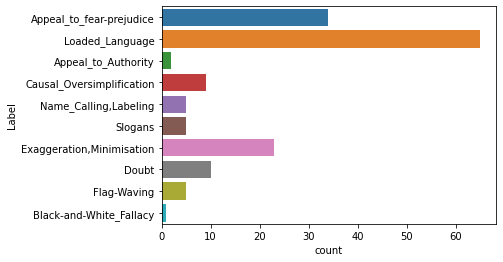

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=o,y='Label',hu)
plt.show()